In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
train.shape

(18288, 3)

In [7]:
test.shape

(5112, 2)

In [8]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [10]:
train_origional = train.copy()
test_origional = test.copy()

In [11]:
train_origional.info()
test_origional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


In [12]:
 for i in (train,test,train_origional,test_origional):
        i['year']=i.Datetime.dt.year
        i['month']=i.Datetime.dt.month
        i['day']=i.Datetime.dt.day
        i['Hours']=i.Datetime.dt.hour

In [13]:
train['Day of week'] = train['Datetime'].dt.dayofweek

In [14]:
temp = train['Datetime']

In [15]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [16]:
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

In [17]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [18]:
train.index =train['Datetime']
train.drop('ID',axis=1)
ts= train['Count']

C:\Users\Marshall\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


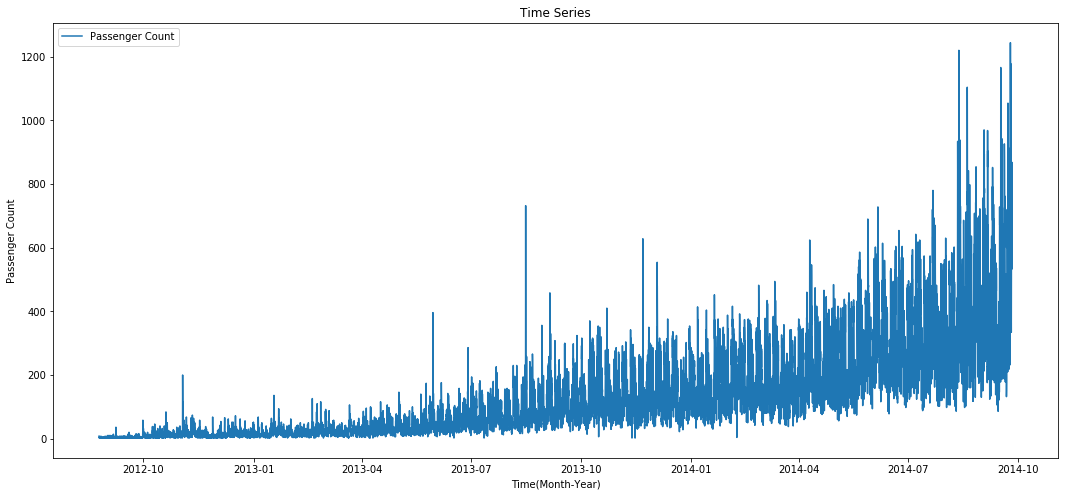

In [19]:
plt.figure(figsize=(18,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(Month-Year)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

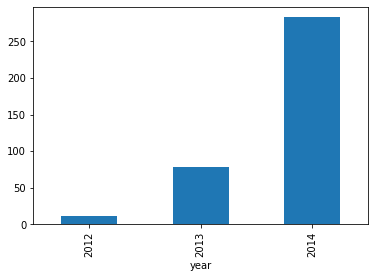

In [20]:
train.groupby('year')['Count'].mean().plot.bar()

In [21]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


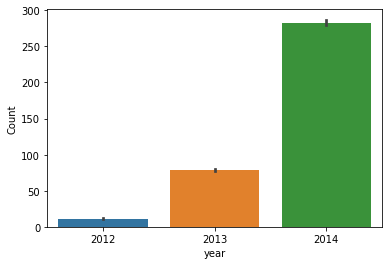

In [22]:
sns.barplot(x=train['year'],y=train['Count'])

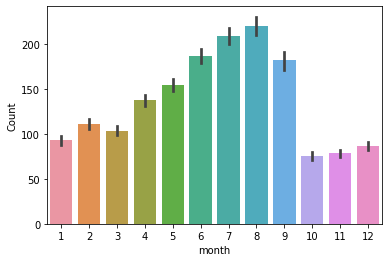

In [23]:
sns.barplot(x=train['month'],y=train['Count'])

In [24]:
temp= train.groupby(['year','month'])['Count'].mean()

In [25]:
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

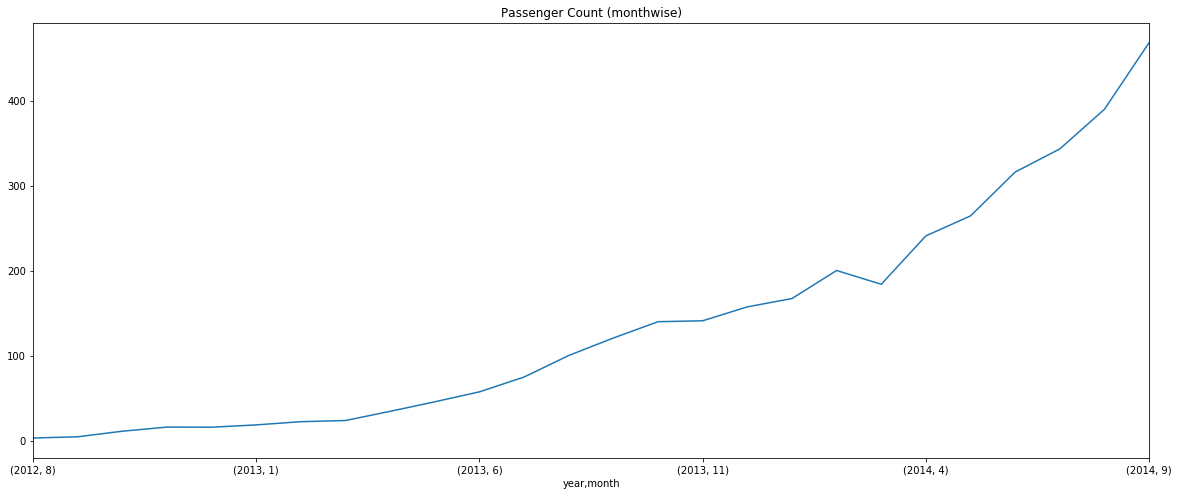

In [26]:
plt.figure(figsize=(20,8))
temp.plot(title='Passenger Count (monthwise)')

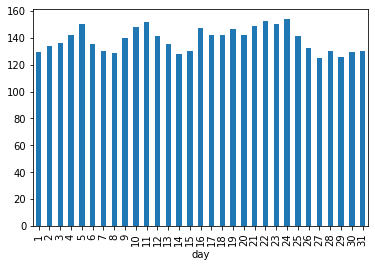

In [27]:
temp3=train.groupby(['day'])['Count'].mean().plot.bar()

In [28]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


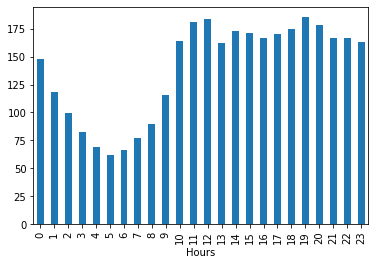

In [29]:
temp4= train.groupby(['Hours'])['Count'].mean().plot.bar()



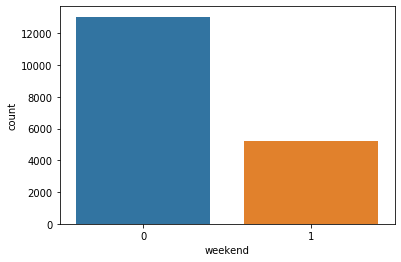

In [30]:
sns.countplot(x=train['weekend'])

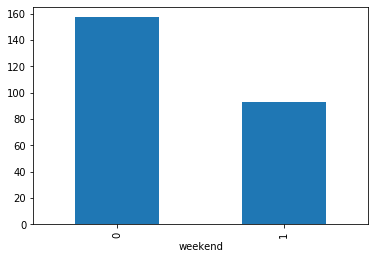

In [31]:
temp5 = train.groupby(['weekend'])['Count'].mean().plot.bar()

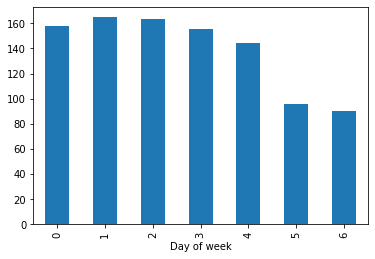

In [32]:
train.groupby(['Day of week'])['Count'].mean().plot.bar()

In [33]:
train.drop('ID',axis=1)

,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [34]:
train['TimeStamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')

In [35]:
train.index= train['TimeStamp']

In [36]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

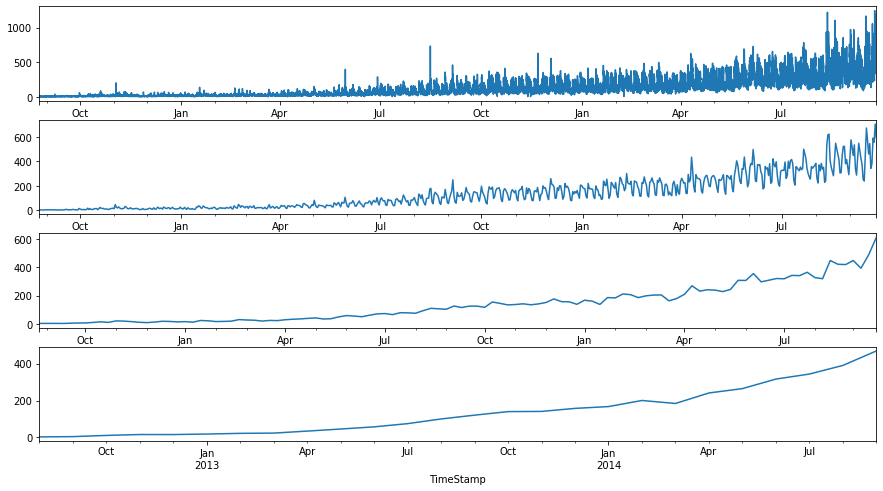

In [37]:
fig,axs=plt.subplots(4,1)
hourly['Count'].plot(figsize=(15,8),ax=axs[0])
daily['Count'].plot(figsize=(15,8),ax=axs[1])
weekly['Count'].plot(ax=axs[2])
monthly['Count'].plot(ax=axs[3])

In [38]:
test['TimeStamp']=pd.to_datetime(test['Datetime'],format='%d-%m-Y %H:%M')
test.index=test['TimeStamp']

In [39]:
test = test.resample('D').mean()

In [40]:
test.head()

,ID,year,month,day,Hours
TimeStamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [41]:
train['TimeStamp']=pd.to_datetime(train['Datetime'],format='%d-%m-Y %H:%M')
train.index=train['TimeStamp']

In [42]:
train=train.resample('D').mean()

In [43]:
train.head()

,ID,Count,year,month,day,Hours,Day of week,weekend
TimeStamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [45]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

 Now we will look at our validation part that has been divided

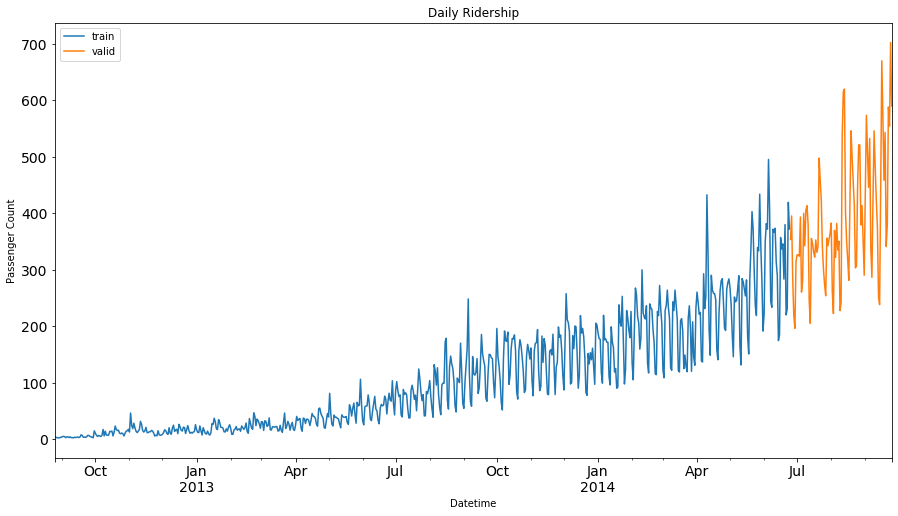

In [53]:

Train.Count.plot(figsize=(15,8),title="Daily Ridership",fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='upper left')


We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

i) Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. 

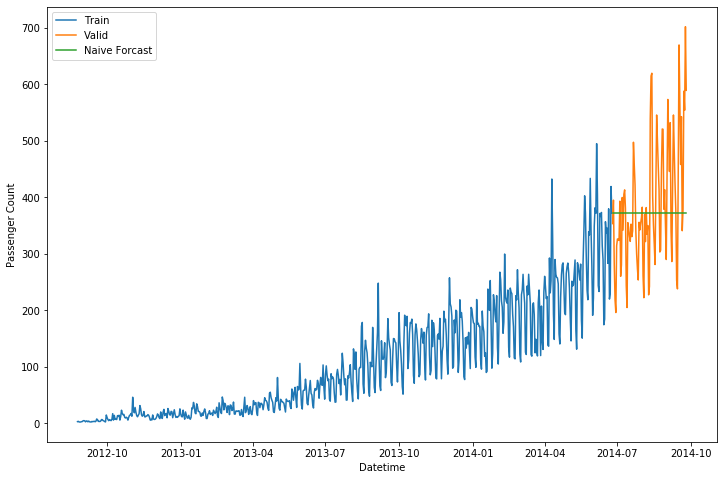

In [57]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forcast')

plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='upper left')


In [58]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


ii) Moving Average

In this technique we will take the average of the passenger counts for last few time periods only.